In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.manifold import TSNE
from adjustText import adjust_text

#### 1. Data Processing

In [65]:
# Load spreadsheet
pd.set_option('display.max_columns', None)  # or a specific number like 100
pd.set_option('display.max_rows', None)     # or a specific number like 100
pd.set_option('display.width', 2000)        # or desired width
pd.set_option('display.max_colwidth', None)    # or any desired column width
df = pd.read_excel('electeddata.xlsx', engine='openpyxl')
df.head()

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,navn,parti,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,2,-2,-2,-2,2,2,-2,1,1,-2,-2,2,2,2,2,Torsten Gejl,Alternativet,0,2,1,0,-2,2,2,2,-2,0,2,-2,-2,-2,0,0,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,2,-2,-2,-2,2,1,-2,1,-1,-2,-2,2,2,2,2,Mai Villadsen,Enhedslisten,1,2,2,0,-1,2,2,2,-2,0,2,-2,-2,0,0,0,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,-2,1,-2,-2,1,-2,2,-1,1,2,-2,1,-1,1,1,Hans Kristian Skibby,Danmarksdemokraterne,-2,-2,0,-2,1,-2,0,1,-2,-1,-2,2,-2,2,-1,-1,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,-1,1,-2,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,Troels Lund Poulsen,Venstre,-1,0,1,1,1,-2,0,1,1,1,-2,2,-1,2,2,1,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


In [9]:
df = df[df['parti'] != 'Løsgænger']
df.dropna()
print(df.shape, f"- {df.shape[0]} rows with {df.shape[1]} features")

(864, 53) - 864 rows with 53 features


In [10]:
# 4 columns of data (cm), going to use PCA
# with 4 columns of result.
# The explained_variance_ratio_ tells us that
# by using 1 principal component, we will get
# 73% of the variance

df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([0.41737636, 0.10259865, 0.04976015, 0.04300927, 0.0293233 ,
       0.0237033 , 0.01994712, 0.01697463, 0.01676652, 0.01608279,
       0.01527152, 0.01449084, 0.01303718, 0.01297392, 0.01200226,
       0.01125725, 0.0102922 , 0.00997773, 0.00986747, 0.00966786,
       0.00928391, 0.0089641 , 0.00877818, 0.00786085, 0.00755989,
       0.00722701, 0.00682415, 0.00670982, 0.00626662, 0.00605007,
       0.00582534, 0.0055948 , 0.0052595 , 0.00505699, 0.00473416,
       0.00466639, 0.00453667, 0.00416406, 0.00398844, 0.00388108,
       0.00341904, 0.00330379, 0.0029882 , 0.00290354, 0.00251036,
       0.00244041, 0.00210387, 0.00141116, 0.00130729])

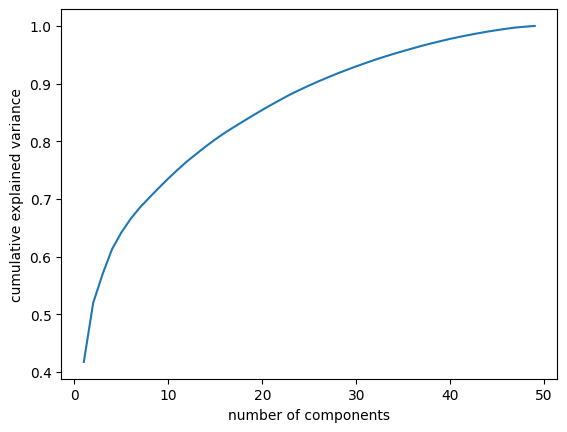

In [11]:
x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.gca().invert_yaxis()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

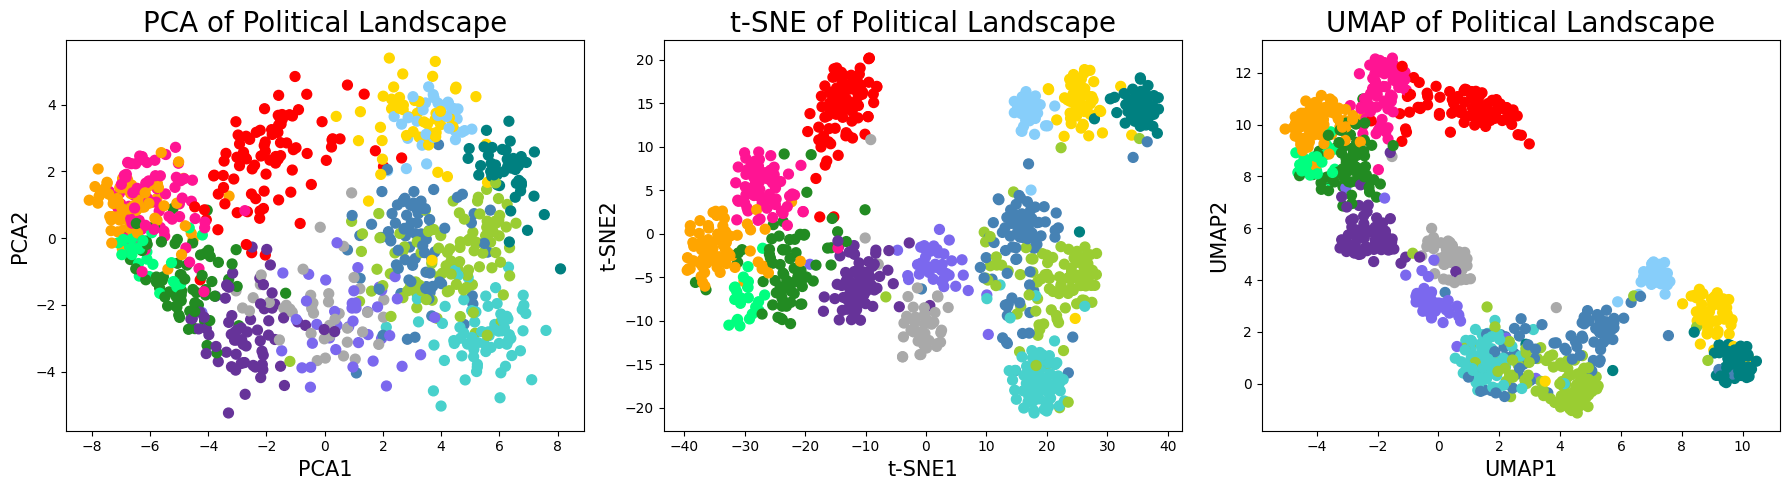

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Loading the data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')

# Extracting the numerical data
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
principalComponents_tsne = tsne.fit_transform(X_standardized)

# Applying UMAP
umap_results = umap.UMAP(n_neighbors=20, min_dist=0.5, metric='correlation').fit_transform(X_standardized)

# Converting to DataFrames
dfs = {
    'PCA': pd.DataFrame(data=principalComponents_pca, columns=['PCA1', 'PCA2']),
    't-SNE': pd.DataFrame(data=principalComponents_tsne, columns=['t-SNE1', 't-SNE2']),
    'UMAP': pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])
}

for key, value in dfs.items():
    dfs[key] = pd.concat([value, df[['navn', 'parti']]], axis=1)
    dfs[key] = dfs[key].dropna()
    dfs[key] = dfs[key][dfs[key]['parti'] != 'Løsgænger']

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Map colors
for key, value in dfs.items():
    dfs[key]['color'] = dfs[key]['parti'].map(party_colors)

# Visualizing
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusted for a single row with 3 columns

titles = ['PCA of Political Landscape', 't-SNE of Political Landscape', 'UMAP of Political Landscape']

for ax, key, title in zip(axes, dfs, titles):
    ax.scatter(dfs[key][dfs[key].columns[0]], dfs[key][dfs[key].columns[1]], c=dfs[key]['color'], s=50)
    ax.set_xlabel(dfs[key].columns[0], fontsize=15)
    ax.set_ylabel(dfs[key].columns[1], fontsize=15)
    ax.set_title(title, fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()


#### 2) An analysis/description of which questions are most crucial concerning their placement on the axes.

Analysis of importance of the original features using squared loadings:

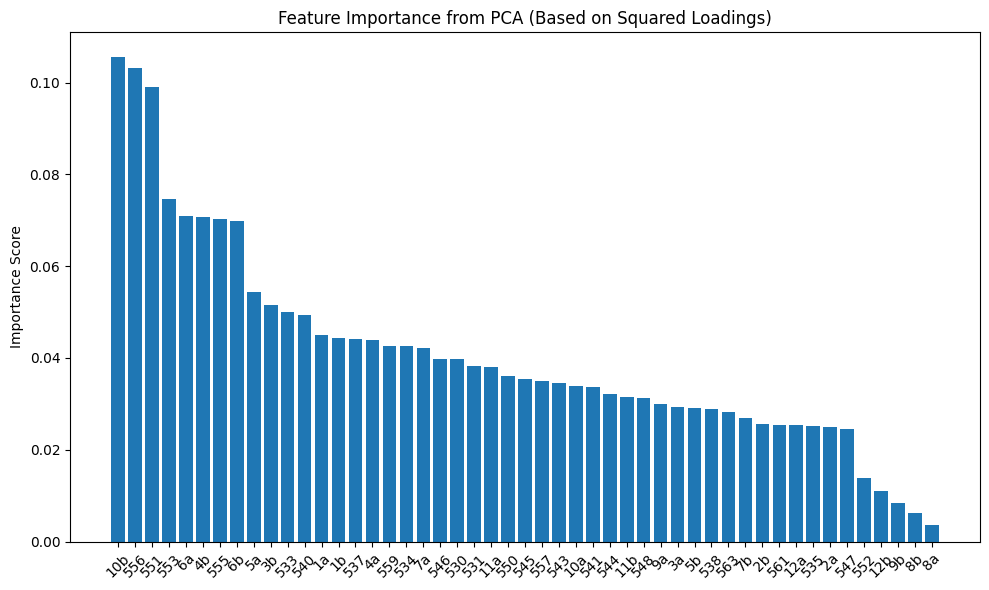

In [15]:
# Load and extract the numerical data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# 1. Compute squared loadings for each feature on each principal component
squared_loadings = np.square(pca.components_.T)

# 2. Sum the squared loadings for each feature across all components
feature_importance = np.sum(squared_loadings, axis=1)

# 3. Rank features based on their importance
sorted_index = np.argsort(feature_importance)[::-1]

# 4. Visualize feature importance
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(np.array(features)[sorted_index], feature_importance[sorted_index])
plt.title('Feature Importance from PCA (Based on Squared Loadings)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


_**Meaning of squared loading:**_<br/>

In a simple context, the squared loading of a feature on one given PC represents the amount of variance of that feature captured by that specific PC.
In our example however we have 2 PCs, and we perform an additional calculation by summing the squared loadings across all PCs which 
gives the total amount of variance of a feature captured by the entire PCA.

_**Meaning of the graph:**_<br/>

Afterwards we sort the original features (the political questions) by how well their variance is represented in the PCA-transformed space as shown exactly in the picture above.

_**Conclusions:**_<br/>
From it we conclude that based on the square loading metric, the top 6 most "important" questions in descending order are:<br/>

10b - "The so-called Arne pension, which gives the possibility of an earlier pension, must be maintained, even if there is a shortage of labour."<br/>
556 - "The so-called Arne pension must be abolished."<br/>
551 - "There must be permanent border control between Denmark and Germany."<br/>
553 - "More education places must be relocated from the big cities."<br/>
6a  - "The Danish immigration policy is too strict."<br/>
4b  - "The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about."<br/>

Seems like the topic of "Arne pension" is the most "polarizing" in the questionnaires of both tv stations.

Analysis of importance of the original features based on the correlation with the PCs:

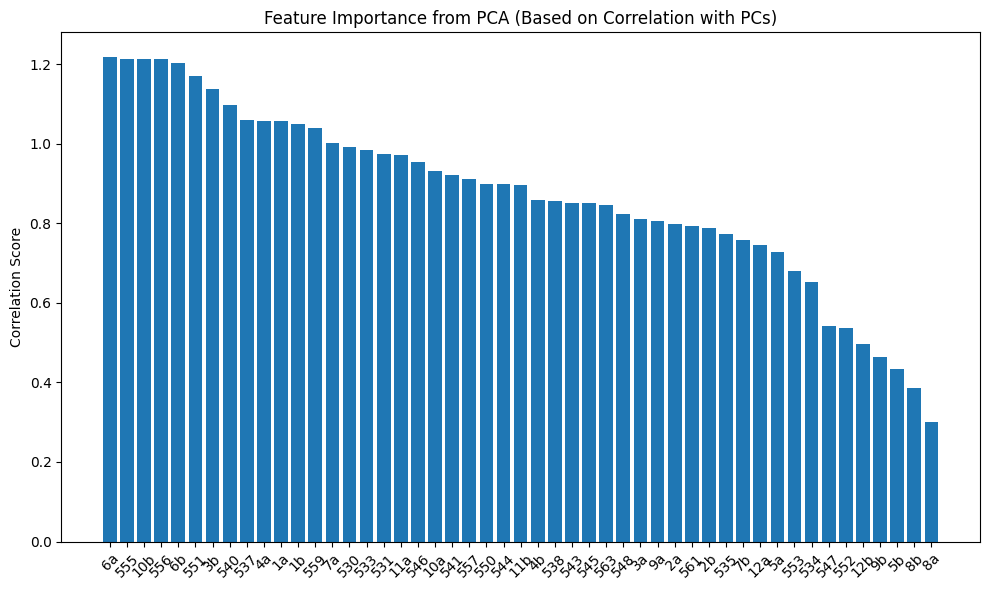

In [16]:
# Load and extract the numerical data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# 1. Convert PCs to a DataFrame for correlation computation
df_pca = pd.DataFrame(principalComponents_pca, columns=['PC1', 'PC2'])

# 2. Add original features to the DataFrame
for col in X.columns:
    df_pca[col] = X_standardized[:, X.columns.get_loc(col)]

# 3. Compute absolute correlation between original features and PCs
correlation_matrix = df_pca.corr().iloc[:2, 2:].abs().transpose()

# 4. Sum the correlations for each feature
feature_correlation = correlation_matrix.sum(axis=1)

# 5. Rank and visualize features based on summed correlation with PCs
sorted_index = feature_correlation.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(feature_correlation.index[sorted_index], feature_correlation.values[sorted_index])
plt.title('Feature Importance from PCA (Based on Correlation with PCs)')
plt.ylabel('Correlation Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

_**Meaning of a feature correlating with a given PC:**_<br/>
The correlation between an original feature and a PC measures how strongly that feature varies (linearly) with that PC. A high absolute correlation means that when the PC increases, the feature tends to either increase (positive correlation) or decrease (negative correlation) in a consistent manner.

When correlating features with PCs, we're looking at how much of the feature's variance aligns with the variance captured by the PCs.
It gives a good measure of the feature's importance in the PCA-transformed space, which is exactly what we're looking for.

_**Difference between squared loading and correlating with PCs:**_<br/>
The key point to understand the difference between the two is that squared loadings directly account for how much variance of a feature is captured by the PCA, the correlation approach emphasizes how each feature varies in alignment with the PCs.

In some cases, for example feature 6a may have moderate squared loadings across many PCs but still have a strong correlation with a specific PC, indicating it's particularly influential for that PC.

_**Meaning of the graph:**_<br/>

We sort the original features (the political questions) in descending order by how how much of the original feature's variance aligns with the variance captured by the PCs.

_**Conclusions:**_<br/>
From it we conclude that based on the correlation with PCs metric, the top 6 most "important" questions in descending order are:<br/>

6a  - "The Danish immigration policy is too strict."<br/>
555 - "Asylum seekers should be sent to a country outside the EU - e.g. Rwanda - while their application is being processed"<br/>
10b - "The so-called Arne pension, which allows for earlier retirement, must be maintained, even if there is a shortage of labour."<br/>
556 - "Den såkaldte Arne-pension skal afskaffes"<br/>
6b  - "It would be a good idea to establish a Danish asylum reception center in Rwanda."<br/>
551 - "There must be permanent border control between Denmark and Germany"<br/>

Here however the topics of "Arne pension", "immigration control" and "asylum in Rwanda" are the most "polarizing" in the questionnaires of both tv stations.<br/>
Furthermore common to both metrics is the topic of "Arne pension" which looks to be the most important.

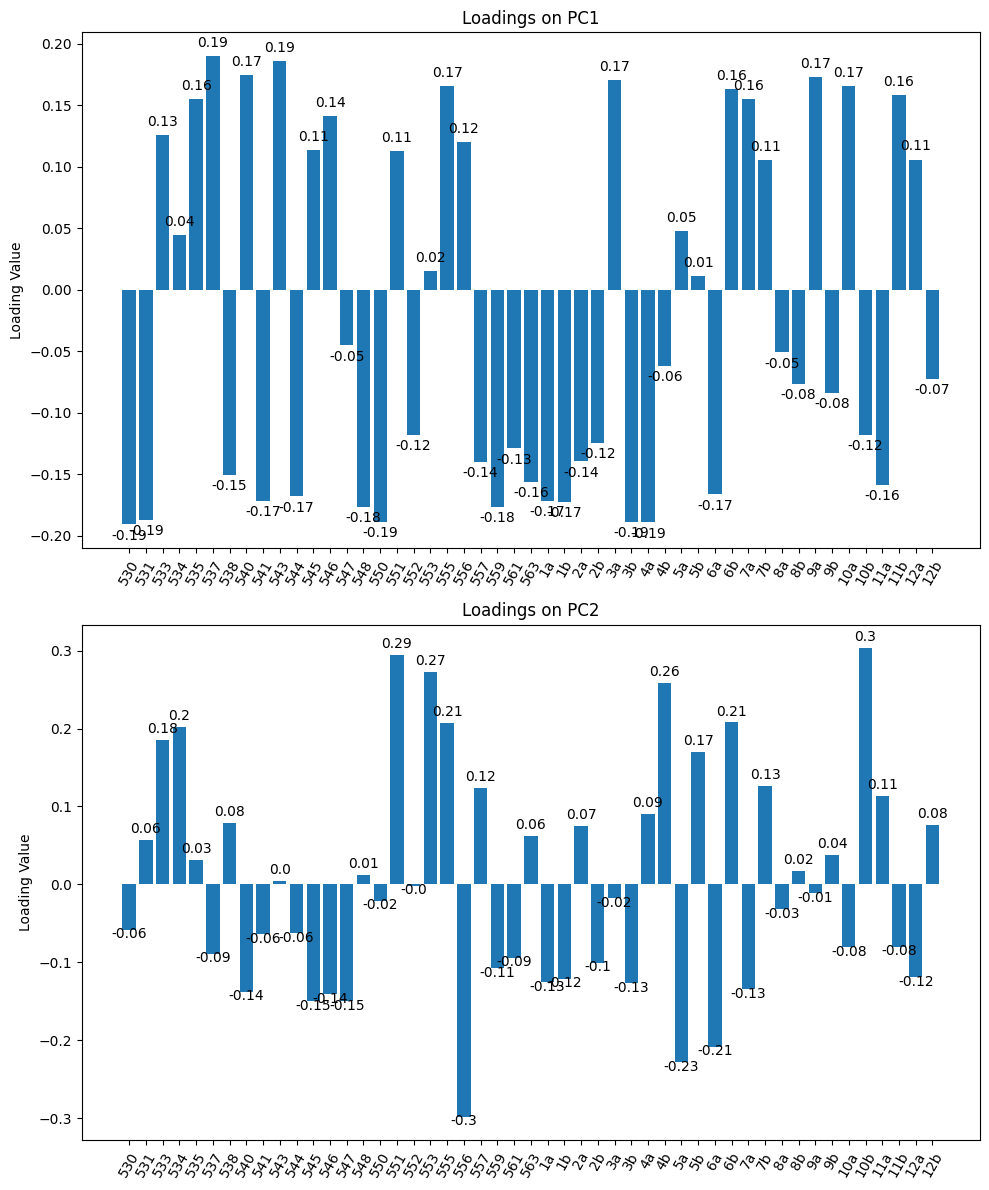

In [17]:
# Load and extract the numerical data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

features = X.columns

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# Extract loadings from PCA
loadings = pca.components_.T

# Visualize loadings
plt.figure(figsize=(10, 12))  # Adjust figure width and height

# Create a bar plot for loadings on PC1
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
bars1 = plt.bar(features, loadings[:, 0])
plt.title('Loadings on PC1')
plt.ylabel('Loading Value')
plt.xticks(rotation=60)  # Adjust rotation

# Annotate with metric values for PC1
for bar in bars1:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.015, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

# Create a bar plot for loadings on PC2
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
bars2 = plt.bar(features, loadings[:, 1])
plt.title('Loadings on PC2')
plt.ylabel('Loading Value')
plt.xticks(rotation=60)  # Adjust rotation

# Annotate with metric values for PC2
for bar in bars2:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.015, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

plt.show()


_**The influence of the original features on the axis placement of the PCs:**_<br/>

The above illustration display the loadings of the original features on the two principal components (PC1 and PC2) derived from a PCA transformation.
The bar heights (either positive or negative) represent the loadings of each original feature on the principal components. They describes the influence or weight of each original feature on the principal component. The sign (positive/negative) indicates the direction towards which the original features influence the resulting PCs.<br/>

For example in the loadings diagram for the PC 1 we can see that features 537 and 543 contribute the most to a making the PC1 gain a positive value. The real world interpretation is that questions 537 and 543 place a candidate on the "right" side of the political spectrum.

#### 3) Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

In [19]:
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
data = df[df['parti'] != 'Løsgænger']
#get the names of all parties
parties = data['parti'].unique()
parties

#get the ids, questions and question category from the different medias
#DR
drq = pd.read_excel('drq.xlsx', engine='openpyxl')
drq = drq.drop(['Info', 'ArgumentFor', 'ArgumentAgainst', 'WordMerger', 'ID_CandidateQuestionType', 'Rule', 'QuestionListData'], axis=1)
drq['ID'] = drq['ID'].astype('string')
#TV2
tv2q = pd.read_excel('tv2q.xlsx', engine='openpyxl')
tv2q = tv2q.drop(['type', 'depends'], axis=1)
ids = {'1a', '1b', '2a', '2b', '3a', '3b','4a', '4b','5a', '5b','6a', '6b','7a', '7b','8a', '8b','9a', '9b','10a', '10b','11a', '11b','12a', '12b' }
tv2q = tv2q[tv2q['id'].isin(ids)]

#rename columns so that we can concant them together
tv2q = tv2q.rename(columns={"ID": "id", "header": "title", "Question": "question"})
drq = drq.rename(columns={"ID": "id", "Title": "title", "Question": "question"})

#make a new df for the questions and the median of the party members's answers
questions = pd.concat([drq, tv2q], ignore_index = True)
questions = questions.set_index('id')

#calculate the median for each question of reach party  and add it to the column
for party in parties:
    subset = data[data['parti'] == party]
    subset = subset.drop(['navn', 'parti', 'storkreds', 'alder'], axis=1)
    medians = subset.median()
    medians_df = pd.DataFrame(medians, columns=[party])
    medians_df.index.name = 'id'
    questions = questions.join(medians_df)

questions

,title,question,Moderaterne,Socialistisk Folkeparti,Alternativet,Enhedslisten,Danmarksdemokraterne,Venstre,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Dansk Folkeparti,Kristendemokraterne,Liberal Alliance,Nye Borgerlige,Det Konservative Folkeparti,Radikale Venstre,Socialdemokratiet
id,,,,,,,,,,,,,,,,
530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje,1.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhøjeste indkomster,1.0,2.0,1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,-2.0,-2.0,-1.0,1.0
533,RET OG STRAF,Kriminalitet begået i udsatte boligområder skal straffes særligt hårdt,-1.0,-2.0,-2.0,-2.0,2.0,1.0,-2.0,2.0,-2.0,-1.0,-1.0,1.0,-2.0,1.0
534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,-2.0,-2.0,-2.0,1.0,-1.0,-2.0,-2.0,2.0,-2.0,-1.0,2.0,-2.0,-2.0,-2.0
535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret",1.0,1.0,-1.0,-2.0,2.0,2.0,-2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere",1.0,-2.0,-2.0,-2.0,1.0,1.0,-2.0,1.0,-1.0,2.0,2.0,2.0,-1.0,-1.0
538,UDDANNELSE,Forældres indkomst skal være et af kriterierne for fordeling af elever i gymnasiet,-2.0,1.0,-1.0,1.0,-2.0,-2.0,-2.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,1.0
540,VELFÆRD,Det skal være muligt at tjene penge på at drive private børnehaver og vuggestuer,1.0,-2.0,1.0,-2.0,1.0,1.0,-2.0,1.0,1.0,2.0,2.0,2.0,1.0,-1.0
541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved salg af bolig,1.0,2.0,1.0,2.0,-2.0,-2.0,2.0,-2.0,-1.0,-2.0,-2.0,-2.0,1.0,-1.0


#### 4) Age of the candidates grouped by parties

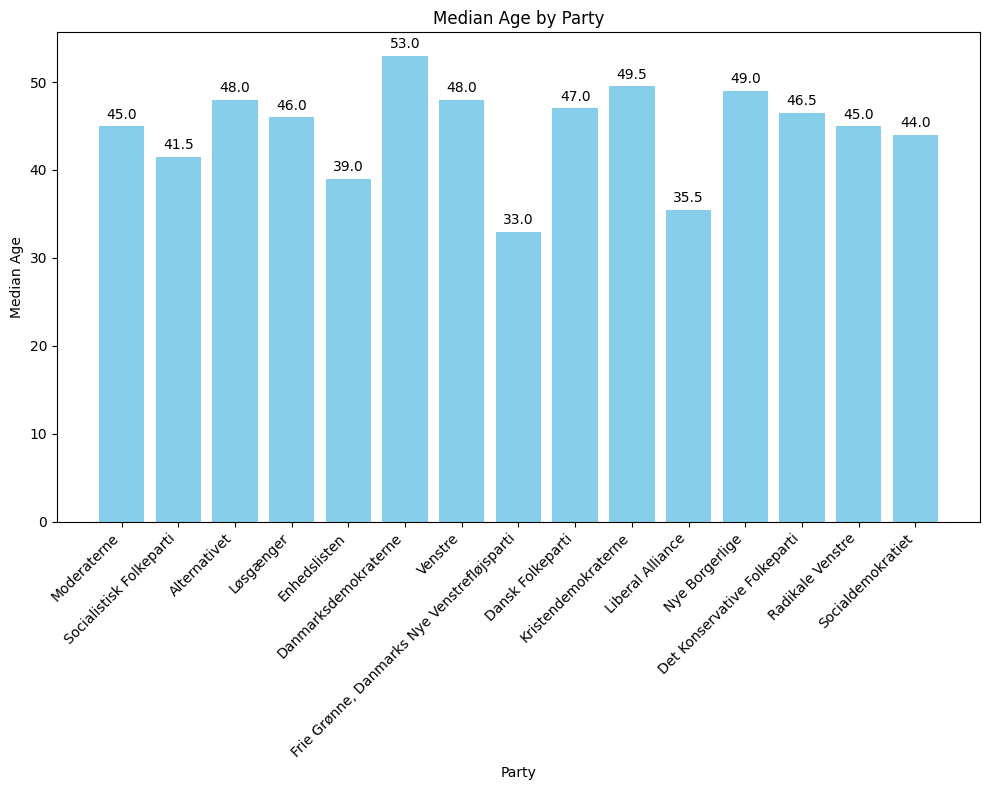

In [7]:
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
#get the names of all parties
parties = df['parti'].unique()
parties

age_df = pd.DataFrame(columns=['party', 'age'])

for party in parties:
    subset = df[df['parti'] == party]
    ages = subset['alder']
    median = ages.median()
    age_df.loc[len(age_df.index)] = [party, median]

plt.figure(figsize=(10, 8))

# Create a bar chart
# 'party' is on x-axis and 'age' is on y-axis
bars = plt.bar(age_df['party'], age_df['age'], color='skyblue')

# Add some labels and a title
plt.xlabel('Party')
plt.ylabel('Median Age')
plt.title('Median Age by Party')
plt.xticks(rotation=45, ha='right')

# Adding the numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 5) An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

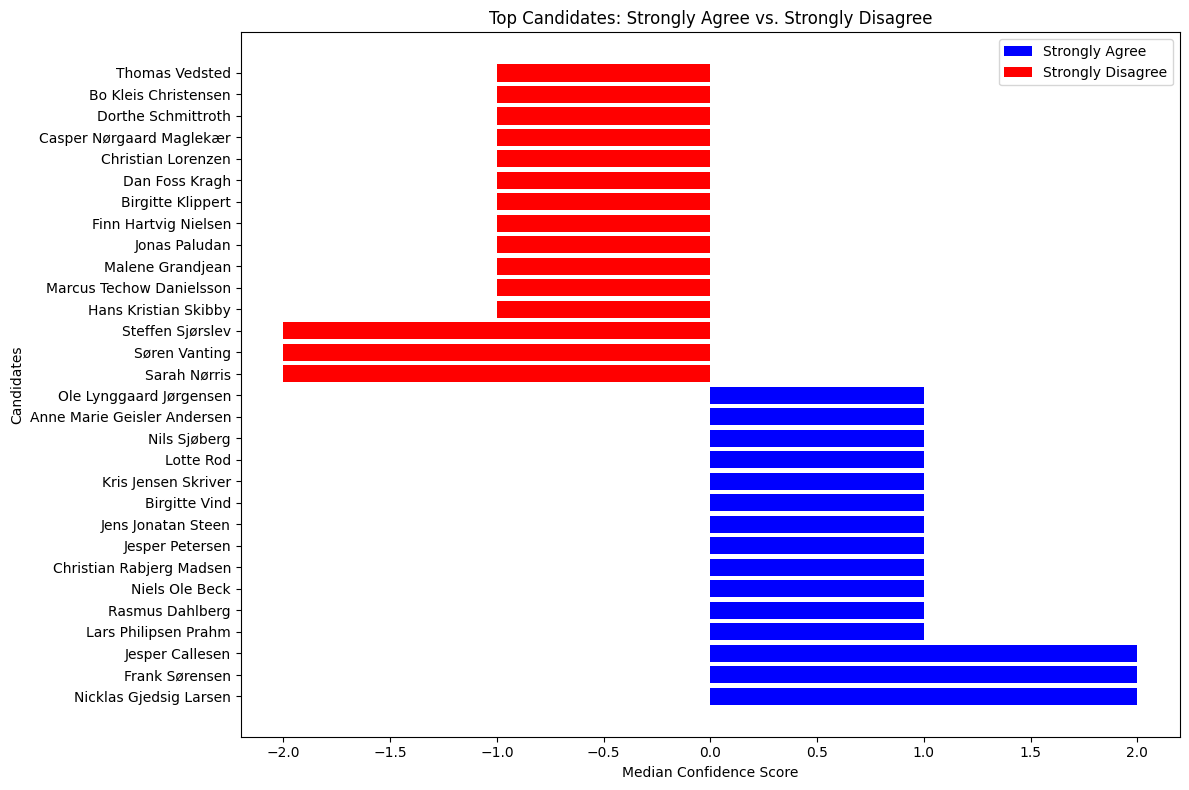

In [11]:
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
df = df.drop(['parti', 'storkreds', 'alder'], axis=1)

person_df = pd.DataFrame(df['navn'], columns=['navn'])

df = df.drop(['navn'], axis=1)
medians = df.apply(lambda x: x.median(), axis=1)
medians_df = pd.DataFrame(medians, columns=['answer'])
medians_df = medians_df.reset_index(drop=True)

person_df = person_df.join(medians_df)


# Define the number of top participants to display for each category
top_n = 10

# Separate the participants who tend to strongly agree (positive medians)
# from those who tend to strongly disagree (negative medians)
strongly_agree = person_df[person_df['answer'] > 0].sort_values(by='answer', ascending=False).head(top_n)
strongly_disagree = person_df[person_df['answer'] < 0].sort_values(by='answer').head(top_n)

plt.figure(figsize=(12, 8))

# Plot the strongly agree candidates (positive median values)
plt.barh(strongly_agree['navn'], strongly_agree['answer'], color='blue', label='Strongly Agree')

# Plot the strongly disagree candidates (negative median values)
plt.barh(strongly_disagree['navn'], strongly_disagree['answer'], color='red', label='Strongly Disagree')

plt.xlabel('Median Confidence Score')
plt.ylabel('Candidates')
plt.title('Top Candidates: Strongly Agree vs. Strongly Disagree')

plt.legend()

plt.tight_layout()
plt.show()

#### 6) Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

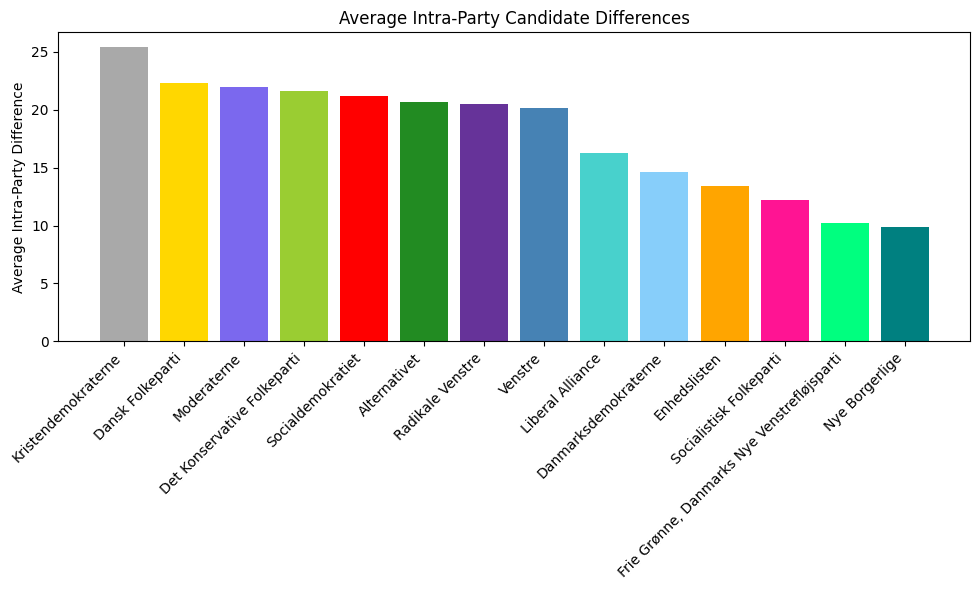

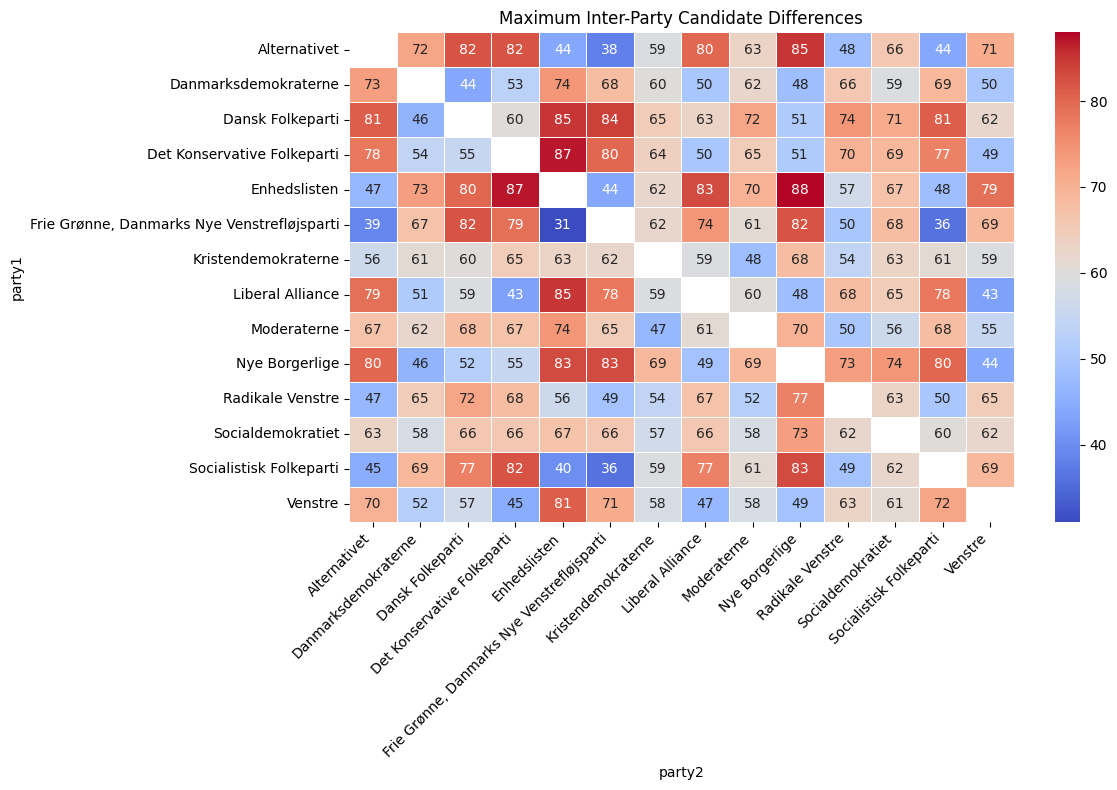

Top 5 Intra-Party Differences:
              candidate1         candidate2             party1             party2  difference  same_party
167233   Mette Reissmann  Bjørn Brandenborg  Socialdemokratiet  Socialdemokratiet          52        True
87534   Leif Lahn Jensen     Nikoline Prehn  Socialdemokratiet  Socialdemokratiet          51        True
164214    Nikoline Prehn  Benny Engelbrecht  Socialdemokratiet  Socialdemokratiet          51        True
37134   Kim Christiansen       Paw Karslund   Dansk Folkeparti   Dansk Folkeparti          49        True
163922    Nikoline Prehn     Simon Kollerup  Socialdemokratiet  Socialdemokratiet          49        True

Top 5 Inter-Party Differences:
             candidate1           candidate2                       party1                       party2  difference  same_party
106422      Clara Turms       Thomas Vedsted                 Enhedslisten               Nye Borgerlige          88       False
104961        Rosa Lund       Thomas Vedsted   

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

df = pd.read_excel('alldata.xlsx', engine='openpyxl')
df = df.drop(['storkreds', 'alder'], axis=1)
df = df[df['parti'] != 'Løsgænger']
df = df.dropna()

# Identify the question columns (assuming they are all numerical)
question_cols = df.columns[df.columns.str.isdigit()]

# Function to calculate differences between candidates
def calculate_differences(df, question_cols):
    differences = []
    for (idx1, row1), (idx2, row2) in combinations(df.iterrows(), 2):
        diff = np.sum(np.abs(row1[question_cols] - row2[question_cols]))
        differences.append({
            'candidate1': row1['navn'],
            'candidate2': row2['navn'],
            'party1': row1['parti'],
            'party2': row2['parti'],
            'difference': diff,
            'same_party': row1['parti'] == row2['parti']
        })
    return pd.DataFrame(differences)

# Calculate all pairwise differences
diff_df = calculate_differences(df, question_cols)

# Aggregate the differences by party
intra_party_diffs = diff_df[diff_df['same_party']].groupby(['party1']).agg({'difference': 'mean'}).rename(columns={'difference': 'avg_intra_party_diff'})
inter_party_diffs = diff_df[~diff_df['same_party']].groupby(['party1', 'party2']).agg({'difference': 'mean'}).rename(columns={'difference': 'avg_inter_party_diff'})

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Bar Plot for Intra-Party Differences
plt.figure(figsize=(10, 6))
intra_party_diffs_sorted = intra_party_diffs.sort_values(by='avg_intra_party_diff', ascending=False)
plt.bar(intra_party_diffs_sorted.index, intra_party_diffs_sorted['avg_intra_party_diff'], color=[party_colors[party] for party in intra_party_diffs_sorted.index])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Intra-Party Difference')
plt.title('Average Intra-Party Candidate Differences')
plt.tight_layout()
plt.show()

# Heatmap for Inter-Party Differences
# Calculate maximum pairwise differences for inter-party candidates
max_inter_party_diffs = diff_df[~diff_df['same_party']].groupby(['party1', 'party2']).agg({'difference': 'max'}).rename(columns={'difference': 'max_inter_party_diff'})

# Pivot this DataFrame to create a matrix suitable for a heatmap
inter_party_pivot = max_inter_party_diffs.reset_index().pivot(index='party1', columns='party2', values='max_inter_party_diff')

plt.figure(figsize=(12, 8))
sns.heatmap(inter_party_pivot, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Maximum Inter-Party Candidate Differences')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top 5 Intra-Party Differences
top_5_intra_party_diffs = diff_df[diff_df['same_party']].nlargest(5, 'difference')
print("Top 5 Intra-Party Differences:")
print(top_5_intra_party_diffs)
print("")

# Top 5 Inter-Party Differences
top_5_inter_party_diffs = diff_df[~diff_df['same_party']].nlargest(5, 'difference')
print("Top 5 Inter-Party Differences:")
print(top_5_inter_party_diffs)
print("")

# Identify the party with the most internal disagreements
most_disagreement_party = intra_party_diffs.idxmax().values[0]
print(f"The party with the most internal disagreements is: {most_disagreement_party}")
print("")

# If you want to show the differences between each candidate within the party:
# Party with the most disagreements
party_candidates = df[df['parti'] == most_disagreement_party]
party_diffs = calculate_differences(party_candidates, question_cols)
print("Differences between each candidate within the party with the most disagreements:")
print(party_diffs[party_diffs['same_party']])
print("")


#### 6) Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
df = df.drop(['storkreds', 'alder'], axis=1)
df = df[df['parti'] != 'Løsgænger']
df = df.dropna()

# Assuming 'navn' (name) won't be used for prediction
df.drop('navn', axis=1, inplace=True)

# Encode the 'parti' column to have numeric labels
label_encoder = LabelEncoder()
df['parti_encoded'] = label_encoder.fit_transform(df['parti'])

# Split the data into features and target
X = df.drop(['parti', 'parti_encoded'], axis=1)
y = df['parti_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Tree
gbt_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
gbt_model.fit(X_train, y_train)

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)
    print(classification_report(y_test_labels, y_pred_labels))
    return y_pred_labels

print("Decision Tree Classification Report:")
dt_pred_labels = evaluate_model(dt_model, X_test, y_test)

print("Random Forest Classification Report:")
rf_pred_labels = evaluate_model(rf_model, X_test, y_test)

print("Gradient Boosting Tree Classification Report:")
gbt_pred_labels = evaluate_model(gbt_model, X_test, y_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Decision Tree Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.67      0.53      0.59        15
                       Danmarksdemokraterne       0.86      1.00      0.92         6
                           Dansk Folkeparti       0.92      0.79      0.85        14
                Det Konservative Folkeparti       0.58      0.82      0.68        17
                               Enhedslisten       0.91      0.83      0.87        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         3
                        Kristendemokraterne       0.25      0.17      0.20         6
                           Liberal Alliance       0.86      0.67      0.75        18
                                Moderaterne       0.75      0.90      0.82        10
                             Nye Borgerlige       0.80      0.86      0.83        14
                           

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

_**Discussion of results:**_

1) Decision Tree Classifier:

    Overall accuracy: 76%<br/>

    _**Positives:**_<br/>
    Performed reasonably well with parties like 'Dansk Folkeparti' and 'Enhedslisten', with F1-scores of 0.85 and 0.87, respectively.

    _**Negatives:**_<br/>
    Struggled with 'Kristendemokraterne' and 'Alternativet', scoring F1-scores of 0.20 and 0.59. This indicates a combination of low precision (many false positives) and recall (missed true positives) for these classes.
    The model's performance is inconsistent across classes, showing it may be overfitting to certain classes or not capturing enough of the variability in the data for others.

2) Random Forest Classifier:

    Overall accuracy: 93%<br/>

    _**Positives:**_<br/>
    Shows a strong improvement over the Decision Tree, which is expected as Random Forests generally improve on the performance of single Decision Trees by reducing overfitting. It scored perfect or near-perfect F1-scores score well on several parties, such as 'Danmarksdemokraterne', 'Dansk Folkeparti', and 'Frie Grønne, Danmarks Nye Venstrefløjsparti'.

    _**Negatives:**_<br/>
    'Alternativet' had a lower recall compared to others, which suggests that the model missed some true positives for this party.

3) Gradient Boosting Tree Classifier:

    Overall accuracy: 93%<br/>

    _**Positives:**_<br/>
    Strengths: Similar to the Random Forest, this model performs very well across almost all parties with no F1-score below 0.67. It shows particularly strong performance for 'Det Konservative Folkeparti' and 'Liberal Alliance' with perfect F1-scores.

    _**Negatives:**_<br/>
    There is a slight decrease in performance for 'Alternativet' and 'Radikale Venstre' when compared to Random Forest, but the differences are minor.

#### 7) A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


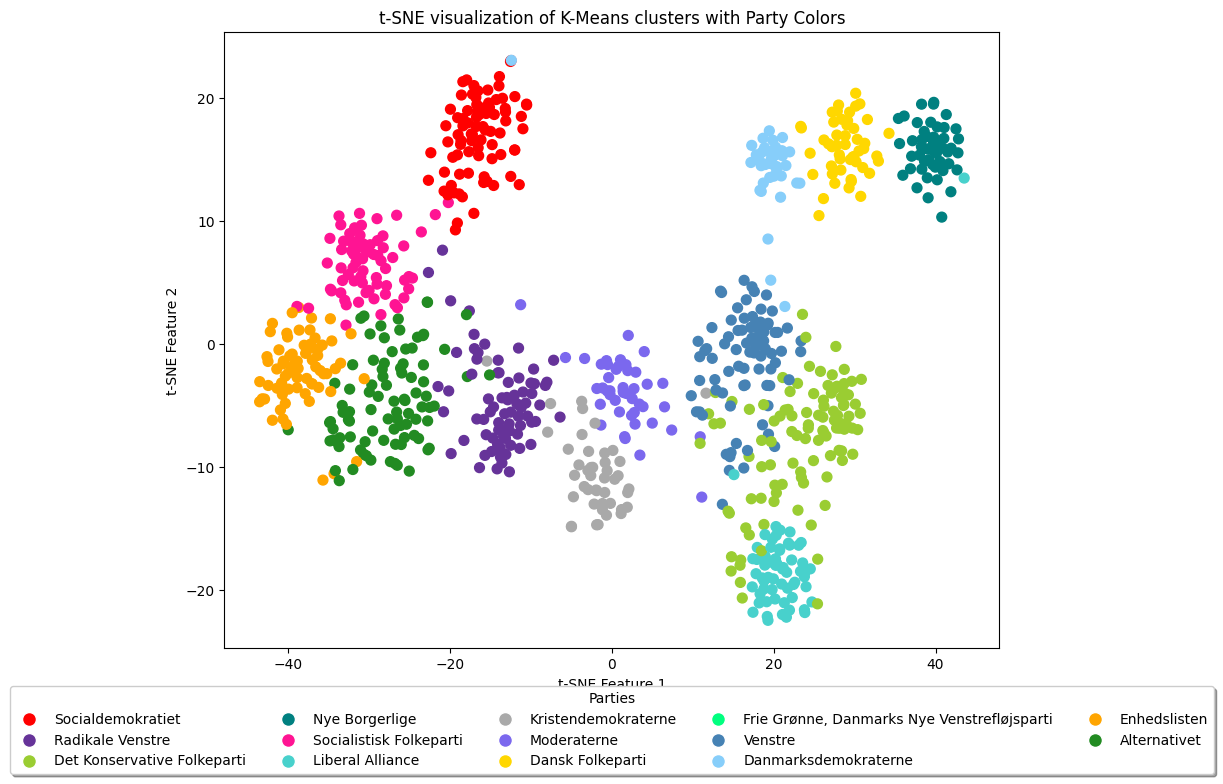

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
df = df.drop(['storkreds', 'alder'], axis=1)
df = df[df['parti'] != 'Løsgænger']
df = df.dropna()

# Extract only the numerical features for clustering
X = df.drop(['navn', 'parti'], axis=1).values

# Standardize features by removing the mean and scaling to unit variance
X_scaled = StandardScaler().fit_transform(X)

# Perform K-Means clustering
# The number of clusters is set to the number of unique parties
num_unique_parties = df['parti'].nunique()
kmeans = KMeans(n_clusters=num_unique_parties, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df['cluster'] = clusters

# Determine the most frequent party in each cluster
party_in_cluster = df.groupby('cluster')['parti'].agg(lambda x: x.value_counts().index[0])

# Political party colors
party_colors = {
    'Socialdemokratiet': 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Map each cluster to its corresponding party color
cluster_colors = party_in_cluster.map(party_colors).to_dict()

# Assign colors to each point based on the cluster-party mapping
point_colors = df['cluster'].map(cluster_colors)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(10, 8))

# Scatter plot of t-SNE features
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=point_colors, s=50)

# Add a legend for the political party colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label=party,
                          markerfacecolor=color, markersize=10)
                   for party, color in party_colors.items()]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5, title="Parties")

# Add plot title and labels
plt.title('t-SNE visualization of K-Means clusters with Party Colors')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Show plot
plt.show()

_**Discussion of results:**_<br/>
As we can see the map resembles a lot the original political map from point 1. Therefore K-Means performs reasonably well.

#### 8) An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

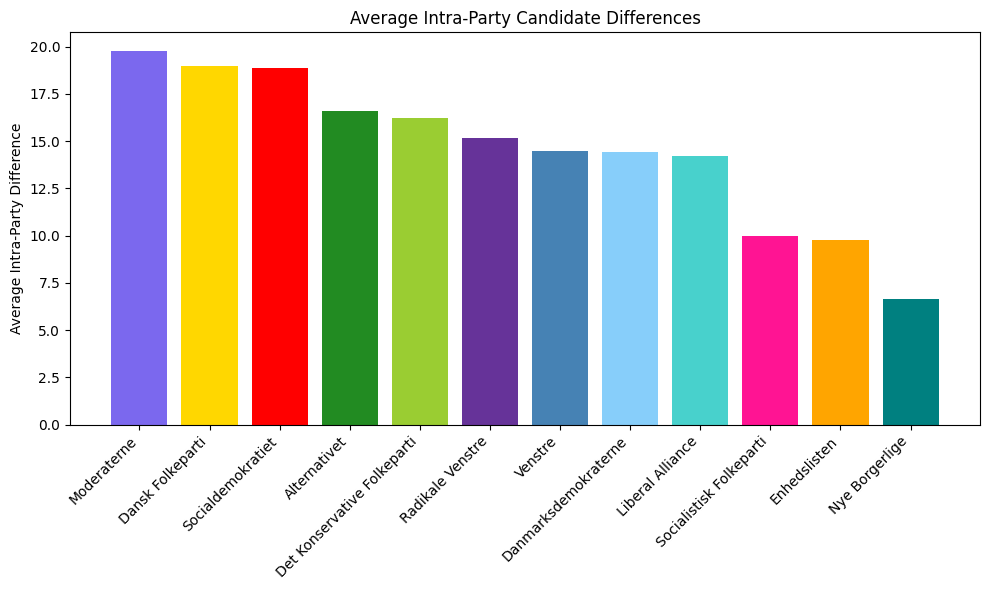

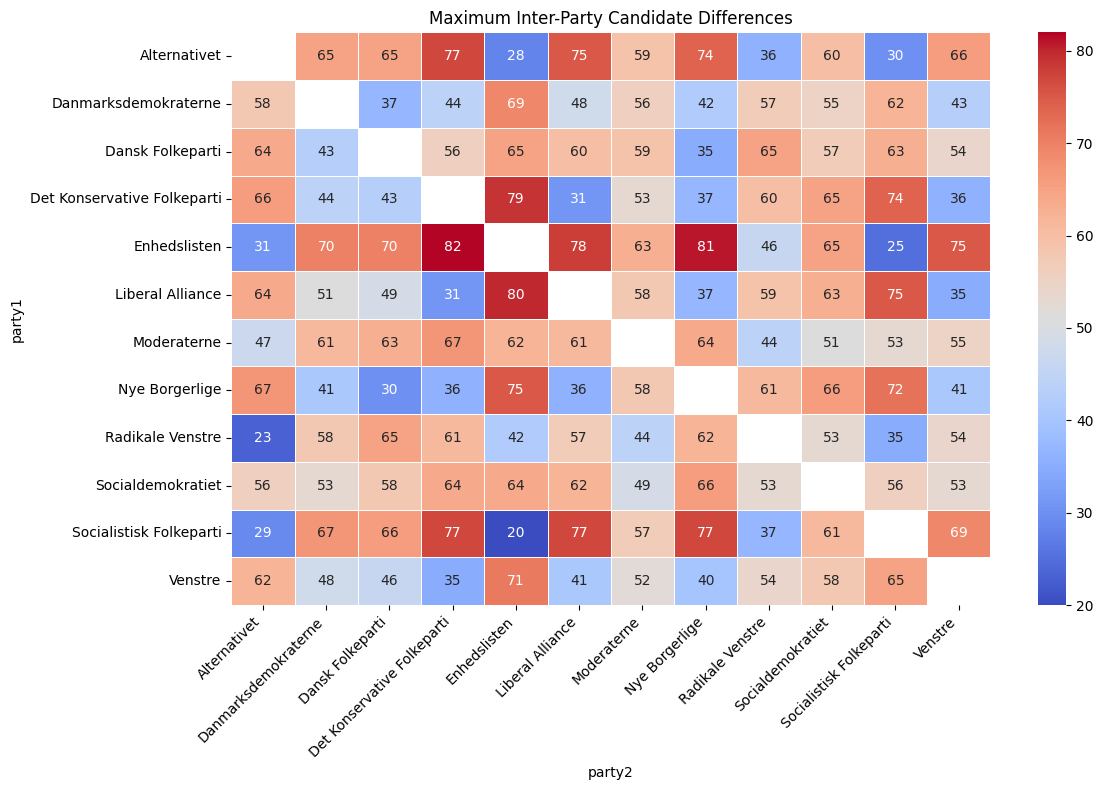

Top 5 Intra-Party Differences:
           candidate1             candidate2             party1             party2  difference  same_party
6355  Mette Reissmann      Bjørn Brandenborg  Socialdemokratiet  Socialdemokratiet          52        True
6410  Mette Reissmann           Frederik Vad  Socialdemokratiet  Socialdemokratiet          47        True
6430  Mette Reissmann  Fie Thorsted Hækkerup  Socialdemokratiet  Socialdemokratiet          46        True
6441  Mette Reissmann        Mattias Tesfaye  Socialdemokratiet  Socialdemokratiet          45        True
6338  Mette Reissmann         Simon Kollerup  Socialdemokratiet  Socialdemokratiet          44        True

Top 5 Inter-Party Differences:
           candidate1          candidate2        party1                       party2  difference  same_party
4371        Rosa Lund         Mai Mercado  Enhedslisten  Det Konservative Folkeparti          82       False
6598  Peder Hvelplund         Mai Mercado  Enhedslisten  Det Konservative Fol

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

df = pd.read_excel('electeddata.xlsx', engine='openpyxl')
df = df.drop(['storkreds', 'alder'], axis=1)
df = df[df['parti'] != 'Løsgænger']
df = df.dropna()

# Identify the question columns (assuming they are all numerical)
question_cols = df.columns[df.columns.str.isdigit()]

# Function to calculate differences between candidates
def calculate_differences(df, question_cols):
    differences = []
    for (idx1, row1), (idx2, row2) in combinations(df.iterrows(), 2):
        diff = np.sum(np.abs(row1[question_cols] - row2[question_cols]))
        differences.append({
            'candidate1': row1['navn'],
            'candidate2': row2['navn'],
            'party1': row1['parti'],
            'party2': row2['parti'],
            'difference': diff,
            'same_party': row1['parti'] == row2['parti']
        })
    return pd.DataFrame(differences)

# Calculate all pairwise differences
diff_df = calculate_differences(df, question_cols)

# Aggregate the differences by party
intra_party_diffs = diff_df[diff_df['same_party']].groupby(['party1']).agg({'difference': 'mean'}).rename(columns={'difference': 'avg_intra_party_diff'})
inter_party_diffs = diff_df[~diff_df['same_party']].groupby(['party1', 'party2']).agg({'difference': 'mean'}).rename(columns={'difference': 'avg_inter_party_diff'})

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Bar Plot for Intra-Party Differences
plt.figure(figsize=(10, 6))
intra_party_diffs_sorted = intra_party_diffs.sort_values(by='avg_intra_party_diff', ascending=False)
plt.bar(intra_party_diffs_sorted.index, intra_party_diffs_sorted['avg_intra_party_diff'], color=[party_colors[party] for party in intra_party_diffs_sorted.index])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Intra-Party Difference')
plt.title('Average Intra-Party Candidate Differences')
plt.tight_layout()
plt.show()

# Heatmap for Inter-Party Differences
# Calculate maximum pairwise differences for inter-party candidates
max_inter_party_diffs = diff_df[~diff_df['same_party']].groupby(['party1', 'party2']).agg({'difference': 'max'}).rename(columns={'difference': 'max_inter_party_diff'})

# Pivot this DataFrame to create a matrix suitable for a heatmap
inter_party_pivot = max_inter_party_diffs.reset_index().pivot(index='party1', columns='party2', values='max_inter_party_diff')

plt.figure(figsize=(12, 8))
sns.heatmap(inter_party_pivot, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Maximum Inter-Party Candidate Differences')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top 5 Intra-Party Differences
top_5_intra_party_diffs = diff_df[diff_df['same_party']].nlargest(5, 'difference')
print("Top 5 Intra-Party Differences:")
print(top_5_intra_party_diffs)
print("")

# Top 5 Inter-Party Differences
top_5_inter_party_diffs = diff_df[~diff_df['same_party']].nlargest(5, 'difference')
print("Top 5 Inter-Party Differences:")
print(top_5_inter_party_diffs)
print("")

# Identify the party with the most internal disagreements
most_disagreement_party = intra_party_diffs.idxmax().values[0]
print(f"The party with the most internal disagreements is: {most_disagreement_party}")
print("")

# If you want to show the differences between each candidate within the party:
# Party with the most disagreements
party_candidates = df[df['parti'] == most_disagreement_party]
party_diffs = calculate_differences(party_candidates, question_cols)
print("Differences between each candidate within the party with the most disagreements:")
print(party_diffs[party_diffs['same_party']])
print("")
